In [ ]:
# Import libraries and modules
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn import tree
%matplotlib inline

In [2]:
# Read and display data shape
imdb = pd.read_csv('IMDB_dataset.csv')
imdb.shape

(50000, 2)

In [3]:
# Display last 5 rows of data
imdb.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [4]:
# Summarize data
imdb.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


#### Check  distribution of data

(-1.1, 1.1, -1.1, 1.1)

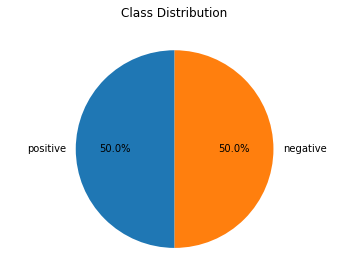

In [5]:
class_dist = imdb.groupby('sentiment').size()
labels = 'positive','negative',
fig, ax = plt.subplots()
ax.set_title('Class Distribution', y=1.08)
ax.pie(class_dist, labels=labels, autopct='%1.1f%%',
       shadow=False, startangle=90)
ax.axis('equal')

In [6]:
# Import label encoder 
from sklearn import preprocessing 

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'species'. 
imdb['sentiment']= label_encoder.fit_transform(imdb['sentiment']) 

imdb['sentiment'].unique() 


array([1, 0])

#### Movie reviews vary in length. For example one movie review may contain 20 words while a second one 500 words.Below is a visualization of review length

Max length of sentence: 13704
Average length of sentence: 1309.43102


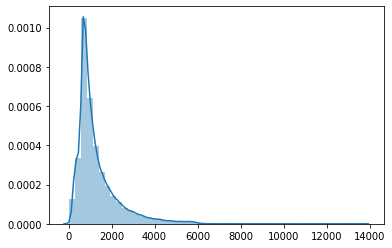

In [34]:
lengths = [len(i) for i in imdb['review']]
print(f'Max length of sentence: {max(lengths)}')
print(f'Average length of sentence: {np.mean(lengths)}')

sns.distplot(lengths)

#### Bag of Words
In order to perform machine learning on text documents, we first need to turn the text content into numerical feature vectors. Text preprocessing, tokenizing and filtering of stopwords are all included in CountVectorizer, which builds a dictionary of features and transforms documents to feature vectors

In [32]:
cv = CountVectorizer(stop_words='english') 

#`data` is an array of strings

data_cv = cv.fit_transform(imdb['review']) 
 
print(data_cv)

  (0, 75307)	1
  (0, 57407)	1
  (0, 97949)	2
  (0, 48334)	2
  (0, 65272)	6
  (0, 30033)	2
  (0, 53078)	3
  (0, 42725)	1
  (0, 75711)	2
  (0, 30888)	1
  (0, 40335)	1
  (0, 11989)	6
  (0, 90149)	1
  (0, 86368)	2
  (0, 12922)	1
  (0, 94350)	1
  (0, 78541)	1
  (0, 96866)	4
  (0, 80101)	1
  (0, 99790)	2
  (0, 92697)	1
  (0, 31830)	1
  (0, 41057)	1
  (0, 90720)	1
  (0, 71391)	1
  :	:
  (49999, 94388)	1
  (49999, 51878)	1
  (49999, 45918)	1
  (49999, 31231)	1
  (49999, 7135)	1
  (49999, 40422)	1
  (49999, 61554)	1
  (49999, 44791)	1
  (49999, 44468)	1
  (49999, 32066)	1
  (49999, 6021)	1
  (49999, 92188)	1
  (49999, 49694)	1
  (49999, 84569)	1
  (49999, 56562)	1
  (49999, 74509)	1
  (49999, 30034)	1
  (49999, 13815)	1
  (49999, 15907)	1
  (49999, 31243)	1
  (49999, 38040)	1
  (49999, 74502)	1
  (49999, 60227)	1
  (49999, 21222)	1
  (49999, 100763)	1


CountVectorizer supports counts of N-grams of words or consecutive characters. Once fitted, the vectorizer has built a dictionary of feature indices:

In [33]:
#create a dictionary with feature names as keys and row elements as values
print(cv.vocabulary_)

{'reviewers': 75307, 'mentioned': 57407, 'watching': 97949, 'just': 48334, 'oz': 65272, 'episode': 30033, 'll': 53078, 'hooked': 42725, 'right': 75711, 'exactly': 30888, 'happened': 40335, 'br': 11989, 'thing': 90149, 'struck': 86368, 'brutality': 12922, 'unflinching': 94350, 'scenes': 78541, 'violence': 96866, 'set': 80101, 'word': 99790, 'trust': 92697, 'faint': 31830, 'hearted': 41057, 'timid': 90720, 'pulls': 71391, 'punches': 71438, 'regards': 73904, 'drugs': 27374, 'sex': 80196, 'hardcore': 40397, 'classic': 17478, 'use': 95543, 'called': 14048, 'nickname': 62053, 'given': 37368, 'oswald': 64572, 'maximum': 56385, 'security': 79484, 'state': 85330, 'penitentary': 66873, 'focuses': 34150, 'mainly': 54835, 'emerald': 29180, 'city': 17324, 'experimental': 31282, 'section': 79463, 'prison': 70404, 'cells': 15522, 'glass': 37444, 'fronts': 35325, 'face': 31709, 'inwards': 46429, 'privacy': 70420, 'high': 41839, 'agenda': 3017, 'em': 29064, 'home': 42508, 'aryans': 6130, 'muslims': 606

#### TFIDF
Occurrence count is a good start but there is an issue: longer documents will have higher average count values than shorter documents, even though they might talk about the same topics.

To avoid these potential discrepancies it suffices to divide the number of occurrences of each word in a document by the total number of words in the document: these new features are called tf for Term Frequencies.

Another refinement on top of tf is to downscale weights for words that occur in many documents in the corpus and are therefore less informative than those that occur only in a smaller portion of the corpus.

This downscaling is called tf–idf for “Term Frequency times Inverse Document Frequency”.

Both tf and tf–idf can be computed as follows using TfidfTransformer:

In [11]:
tfidf_transformer = TfidfTransformer()
data_tfidf = tfidf_transformer.fit_transform(data_cv)
print(data_tfidf)

  (0, 99942)	0.04890625187524952
  (0, 99790)	0.10106152333280637
  (0, 97949)	0.06640307906559108
  (0, 97942)	0.04060482426826181
  (0, 96866)	0.20166193716918787
  (0, 96687)	0.052823065115059846
  (0, 95543)	0.04330805826017266
  (0, 94350)	0.09621766058082629
  (0, 93828)	0.07204497358511446
  (0, 93010)	0.05016850503426771
  (0, 92697)	0.06278876578654087
  (0, 91511)	0.0580728294584372
  (0, 90720)	0.0913102464564074
  (0, 90149)	0.03334777573803177
  (0, 89911)	0.06267083844508399
  (0, 88955)	0.05893040275234511
  (0, 87591)	0.06704159867502894
  (0, 86368)	0.1431390266551642
  (0, 86184)	0.05552904598205105
  (0, 85330)	0.05686590370067768
  (0, 85241)	0.08787994726475461
  (0, 83481)	0.0706737110103365
  (0, 82225)	0.06541823446381036
  (0, 81257)	0.04097039608076125
  (0, 80321)	0.0868777963643151
  :	:
  (49999, 50018)	0.11358277787914993
  (49999, 49694)	0.18939483531126416
  (49999, 48334)	0.05042376352379324
  (49999, 45918)	0.191945668542888
  (49999, 44791)	0.11503568

In [12]:
# Import train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_tfidf, imdb['sentiment'], test_size=0.30)

### Now that we have our features, we can train a classifier to try to predict the category of a post. Let’s start with a naïve Bayes classifier, which provides a nice baseline for this task. scikit-learn includes several variants of this classifier; the one most suitable for word counts is the multinomial variant:

####  Naive Bayes Classification

In [13]:
bayes_clf = MultinomialNB().fit(X_train, y_train)
bayes_clf_predicted = bayes_clf.predict(X_test)
print('Test accuracy: %.2f%%' % (np.mean(bayes_clf_predicted == y_test)*100))

Test accuracy: 86.49%


In [14]:
#Classification report for bag of words for Naive Bayes classification
bayes_clf_report=classification_report(y_test,bayes_clf_predicted,target_names=['Positive','Negative'])
print(bayes_clf_report)

              precision    recall  f1-score   support

    Positive       0.86      0.88      0.87      7514
    Negative       0.87      0.85      0.86      7486

    accuracy                           0.86     15000
   macro avg       0.87      0.86      0.86     15000
weighted avg       0.87      0.86      0.86     15000



[[6387 1099]
 [ 927 6587]]


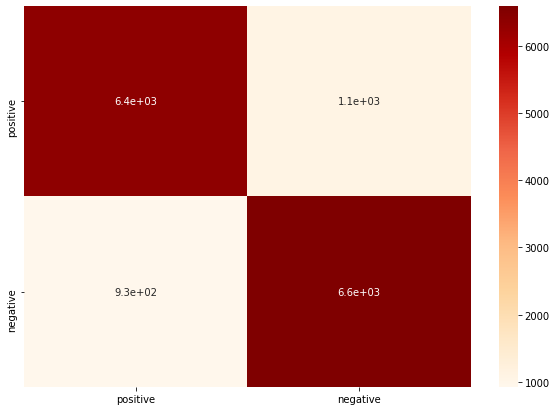

In [16]:
bayes_clf_cm=confusion_matrix(y_test,bayes_clf_predicted,labels=[1,0])
print(bayes_clf_cm)

# Plot Confusion Matrix for Naive Bayes
bayes_clf_dm = pd.DataFrame(bayes_clf_cm, index = [i for i in ['positive', 'negative']],
              columns = [i for i in ['positive', 'negative']])
plt.figure(figsize = (10,7))
sns.heatmap(bayes_clf_dm, annot=True,cmap="OrRd")

####  Linear SVC Classification

In [17]:
LinearSVC_clf = LinearSVC().fit(X_train, y_train)
LinearSVC_clf_predicted = LinearSVC_clf.predict(X_test)
print('Test accuracy: %.2f%%' % (np.mean(LinearSVC_clf_predicted == y_test)*100))

Test accuracy: 89.70%


In [18]:
#Classification report for bag of words 
LinearSVC_clf_report=classification_report(y_test,LinearSVC_clf_predicted,target_names=['Positive','Negative'])
print(LinearSVC_clf_report)

              precision    recall  f1-score   support

    Positive       0.90      0.89      0.90      7514
    Negative       0.89      0.90      0.90      7486

    accuracy                           0.90     15000
   macro avg       0.90      0.90      0.90     15000
weighted avg       0.90      0.90      0.90     15000



[[6764  722]
 [ 823 6691]]


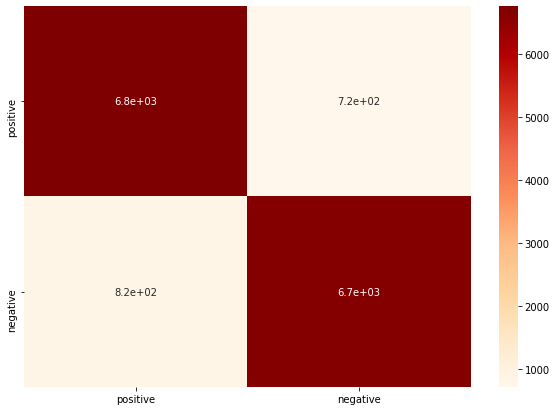

In [21]:
LinearSVC_clf_cm=confusion_matrix(y_test,LinearSVC_clf_predicted,labels=[1,0])
print(LinearSVC_clf_cm)

# Plot Confusion Matrix
LinearSVC_clf_df_cm = pd.DataFrame(LinearSVC_clf_cm, index = [i for i in ['positive', 'negative']],
              columns = [i for i in ['positive', 'negative']])
plt.figure(figsize = (10,7))
sns.heatmap(LinearSVC_clf_df_cm, annot=True,cmap="OrRd")

####  Decision Tree Classification

In [23]:
DecisionTree_clf = tree.DecisionTreeClassifier().fit(X_train, y_train)
DecisionTree_clf_predicted = DecisionTree_clf.predict(X_test)
print('Test accuracy: %.2f%%' % (np.mean(DecisionTree_clf_predicted == y_test)*100))

Test accuracy: 72.49%


In [24]:
#Classification report for bag of words 
DecisionTree_clf_report=classification_report(y_test,DecisionTree_clf_predicted,target_names=['Positive','Negative'])
print(DecisionTree_clf_report)

              precision    recall  f1-score   support

    Positive       0.72      0.73      0.73      7514
    Negative       0.73      0.72      0.72      7486

    accuracy                           0.72     15000
   macro avg       0.72      0.72      0.72     15000
weighted avg       0.72      0.72      0.72     15000



[[5363 2123]
 [2003 5511]]


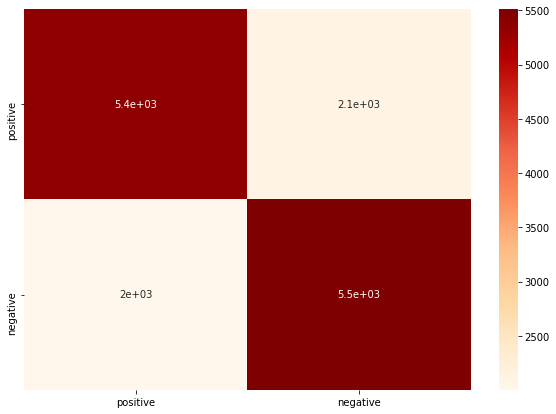

In [27]:
DecisionTree_clf_cm=confusion_matrix(y_test,DecisionTree_clf_predicted,labels=[1,0])
print(DecisionTree_clf_cm)

# Plot Confusion Matrix
DecisionTree_clf_df_cm = pd.DataFrame(DecisionTree_clf_cm, index = [i for i in ['positive', 'negative']],
              columns = [i for i in ['positive', 'negative']])
plt.figure(figsize = (10,7))
sns.heatmap(DecisionTree_clf_df_cm, annot=True,cmap="OrRd")

#### Word Cloud

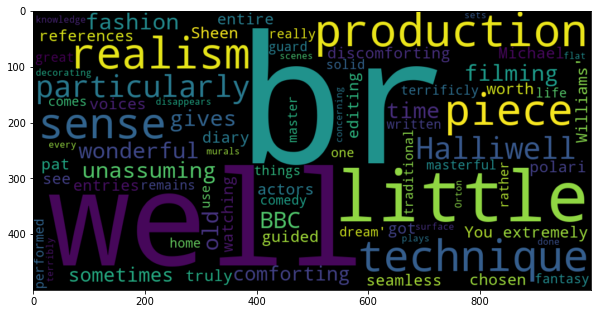

In [30]:
from wordcloud import WordCloud,STOPWORDS

#word cloud for positive review words
plt.figure(figsize=(10,10))
positive_text=imdb.review[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')

<function matplotlib.pyplot.show(*args, **kw)>

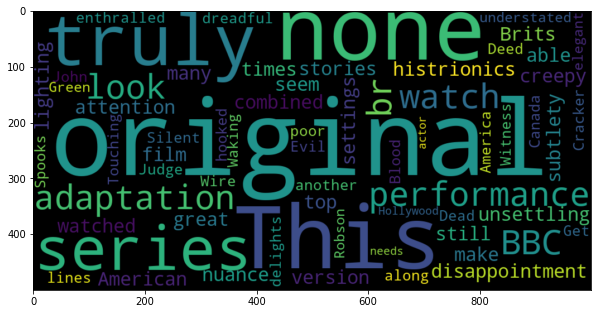

In [31]:
#Word cloud for negative review words
plt.figure(figsize=(10,10))
negative_text=imdb.review[5052]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show

In [35]:
import nltk
from nltk.stem.porter import PorterStemmer
from bs4 import BeautifulSoup
import re,string,unicodedata

In [36]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

NameError: name 'ToktokTokenizer' is not defined

In [ ]:
# #Removing the html strips
# def strip_html(text):
#     soup = BeautifulSoup(text, "html.parser")
#     return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_special_characters(text)
    text = simple_stemmer(text)
    return text
#Apply function on review column
imdb['review']=imdb['review'].apply(denoise_text)

In [ ]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
imdb['review']=imdb['review'].apply(remove_stopwords)

In [ ]:
embedding_size = 60
window_size = 40
min_word = 5
down_sampling = 1e-2

In [ ]:
# # Model
# # Conv:
#     # filter: dimensionality of the output space (32 dimensions) 
#     # kernel_size: reads (window) embedded word representations 3 vector elements of the word embedding at a time
#     # padding: "same" results in padding the input such that the output has the same length as the original input
#     # activation: activation function to use is 'relu': relu has better properties and speeds up the training
# # MaxPooling:
#     # pool_size: 2 the pooling layer is used to reduce the amount of parameters to simplify the computation
# # Flatten
#     # to connect a Dense layer directly to an Embedding layer, flatten the 2D output matrix to a 1D vector
# # Dense (sigmoid): sigmoid activation will produce a float number between 0 and 1

# print('Build CNN model...')
# model = Sequential()
# model.add(Embedding(top_words, 32, input_length=max_words))
# model.add(Conv1D(filters=32, 
#                  kernel_size=3, 
#                  padding='same', 
#                  activation='relu'))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Flatten())
# model.add(Dense(250, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

# # we used binary cross entropy loss here because it is a binary classification problem

# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# print(model.summary())

In [ ]:

# # epochs: it passed 2 times through the full training set
# # batch size: the number of training examples in one forward/backward pass
# # vebose: 2 = one line per epoch
#     # running the example (accuracy of 88.73%) offers a small improvement over the neural network model above

# history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=2, batch_size=128, verbose=2)

In [ ]:

# scores = model.evaluate(x_test, y_test, verbose=0)
# print("Accuracy: %.2f%%" % (scores[1]*100))